In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

In [2]:
df = pd.read_csv("Car details v3.csv")
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [3]:
for cat in df.columns[4:7]:
    print(df[cat].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']


In [4]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [83]:
df[df.isnull()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.dropna(how='any')

In [85]:
display(df.shape, df.isnull().sum())

(7906, 13)

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 864.7+ KB


### Primeros pasos de preprocessing
* Para la variable 'name' deberiamos utilizar solo la primera palabra, que es la que denota la "Marca" del auto y considerarla como nueva variable en una columna llamada "Marca"~y otra con el modelo "Model".~
* Verificar con cada una de las columnas con "Mising values" si estas tienen alguna correlacion importante con "Selling_Price" para utilizarlas como posibles variables, de no ser asi eliminar las que no tengan una correlacion importante, (Ademas de verificar si entre estas hay una correlacion mayor al 0.8 y eliminar una de ellas para evitar problemas de "cruce")
* Suplantar la columna "Year" por una que especifique la antiguedad del vehiculo, es decir, Year-datetime.now.year.
* Torque, evaluar dos posibilidades, utilizar las variables de Newton-meter(Nm) o RPM,__(1 newton metro ≈ 0.102 kilogramo metro.)__ para el caso de RPM no habria que hacer conversiones, pero Nm si. Aunque la relacion entre Nm y RPM resulta en Potencia/HP.
> Considerancion: En el caso de los B.H.P. se tiene en cuenta la pérdida de potencia provocada por la fricción, aspecto que no se tiene en cuenta a la hora de medir la potencia utilizando la unidad de medida H.P.
* Limpiar los valores de las columnas (Torque, max_power,engine, mileage) elimnando su variable y solo utilizar el valor numerico
* _\d+Nm(?=@)_ formula Regex para extraccion de numero en Newton-meter
* _\d+\.*\d(?=@)(?<!kgm)_ formula Regex para extraccion de numero para casos de Kgm

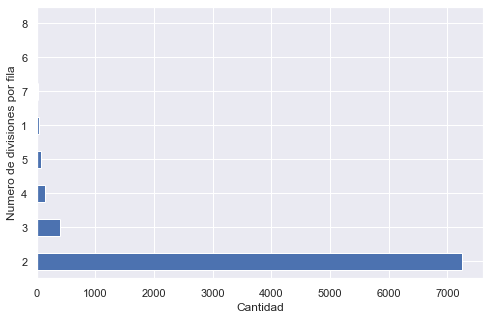

In [87]:
%matplotlib inline
spliting = [len(x) for x in df['torque'].str.split(' ')]

figure= plt.figure(figsize=(8,5))
pd.Series(spliting).value_counts().plot(kind='barh')
plt.ylabel('Numero de divisiones por fila')
plt.xlabel('Cantidad')

plt.show()

### Creacion de columna para RPM

Dicho grafico explica como esta distribuido la variable torque, segun los difrentes modos en los que se ingresaron los datos. Lo ideal seria utilizar aquellos que estan compuestos de dos(2) elementos, pero en este caso, intentare recuperar la mayoria de muestras que pueda.

In [88]:
# Para splits cuya longitud es igual a 4 el orden de las variables es irregular, por eso solo tomaremos el ultimo valor para estos casos
#y procederemos a eliminar las filas de los valores errados
d = {2:1, 3:1, 5:3, 6:3, 7:3, 8:4}
rpm = [x[d.get(len(x),-1)]  for x in df['torque'].str.split(' ')]
display(len(rpm), rpm)

7906

['2000rpm',
 '1500-2500rpm',
 '2,700(kgm@',
 '1750-2750rpm',
 '4,500(kgm@',
 '4000rpm',
 '4,500(kgm@',
 '2500rpm',
 '1800-2400rpm',
 '2000rpm',
 '2250rpm',
 '4500rpm',
 '2000rpm',
 '3500rpm',
 '3500-3600rpm',
 '1750rpm',
 '1750-2750rpm',
 '3000rpm',
 '1500-2750rpm',
 '2000rpm',
 '1750rpm',
 '2000rpm',
 '1750rpm',
 '3500rpm',
 '4000rpm',
 '3500rpm',
 '1750rpm',
 '3500rpm',
 '2500rpm',
 '1750rpm',
 '3000rpm',
 '4000rpm',
 '1750rpm',
 '3500rpm',
 '3500rpm',
 '4850rpm',
 '4000rpm',
 '1700-2700rpm',
 '2500rpm',
 '1750-2500rpm',
 '4600rpm',
 '4800rpm',
 '4000rpm',
 '1750rpm',
 '3500rpm',
 '1400-3400rpm',
 '1400-3400rpm',
 '1250-4000rpm',
 '1750rpm',
 '2000-2500rpm',
 '1750rpm',
 '4400rpm',
 '1750rpm',
 '1200-3400rpm',
 '1200-3600rpm',
 '1750-2500rpm',
 '4000rpm',
 '1750-3000rpm',
 '1400-2800rpm',
 '1750-3000rpm',
 '4000rpm',
 '1500-2750rpm',
 '2000rpm',
 '4000rpm',
 '4000rpm',
 '1500-3000rpm',
 '1750rpm',
 '3500rpm',
 '1500-3000rpm',
 '1750rpm',
 '1750rpm',
 '4000rpm',
 '2000rpm',
 '1400-340

In [4]:
d = {2:1, 3:1, 5:3, 6:3, 7:3, 8:4} # de acuerdo a la longitud de x hara un mapping para saber en que celda se encuentra el rpm
df['rpm'] = [x[d.get(len(x),-1)]  for x in df['torque'].str.split(' ')]
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000rpm
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1500-2500rpm
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,"2,700(kgm@"
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1750-2750rpm
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,"4,500(kgm@"


Intentando unificar los caracters que separan algunos valores, ademas de ajustar algunos valores que no pudieron limpiarse al momento de extraccion.

In [5]:
df['rpm'].replace({'\,': '',
                   'rpm':'',
                   '\(kgm@':'',
                   '\-':' ',
                   '\~':' ',
                   '\+/-':' ',
                   '\+/':' ',
                   '400Nm': '4000',
                  '\(NM@': ''}, regex=True, inplace=True)

In [6]:
df = df.drop(index=df[(df.rpm =='')].index, axis='index')
df = df.drop(index=df[(df.rpm =='/')].index, axis='index')
df = df.drop(index=df[(df.rpm =='480Nm')].index, axis='index') # Porque estas celdas no tienen valor de 'rpm'.

In [7]:
def division_rpm(valor):
    if len(valor.split(' ')) == 3:
        a, b, c = valor.split(' ')
        resultado = (int(a)+int(c))/2
    elif len(valor.split(' ')) == 2:
        a, b = valor.split(' ')
        resultado = (int(a)+int(b))/2
    else:
        resultado = int(valor)        
    return resultado

In [8]:
df['rpm'] = df['rpm'].apply(division_rpm)

### Creacion de columna Newton-meter

In [94]:
Nm_test = pd.Series([x[0] for x in df['torque'].str.split(' ')])
display('Nm@' in Nm_test[0], Nm_test[0].endswith('m@'), Nm_test[:10])

True

True

0       190Nm@
1       250Nm@
2        12.7@
3         22.4
4        11.5@
5    113.75nm@
6         7.8@
7        59Nm@
8       170Nm@
9       160Nm@
dtype: object

In [95]:
display(Nm_test[Nm_test.str.contains(r'\d+\.*\d+',regex=True)],
        len(Nm_test[Nm_test.str.contains(r'\d+\.*\d+',regex=True)]),
       Nm_test[~Nm_test.str.contains(r'\d+\.*\d+',regex=True)],
       len(Nm_test[~Nm_test.str.contains(r'\d+\.*\d+',regex=True)]))

0         190Nm@
1         250Nm@
2          12.7@
3           22.4
4          11.5@
          ...   
7853    113.7Nm@
7854         24@
7855      190Nm@
7856      140Nm@
7857      140Nm@
Length: 7857, dtype: object

7857

4747    6@
dtype: object

1

Para valores en los cuales el resultado del findall no es del tipo list (no sé porque algunos casos no los convierte a list), no puede leer sus elementos con [0], es decir no cumplen las mismas condiciones que el ejemplo a continuacion...

In [96]:
list(map(float, re.findall('(\d+\.*\d+)(?=Nm@)', Nm_test[5], flags=re.IGNORECASE)))

[113.75]

In [97]:
float(re.findall('(\d+\.*\d+)', Nm_test[6])[0])/np.array(0.102)

76.47058823529412

### *Primer intento fallido*

In [98]:
def clean_nm(valor):
    if 'kgm' in valor:
        resultado = float(re.findall(r'\d+\.*\d+(?=kgm)', valor)[0])/0.102 # Conversion de Kgm a Nm
        #El resultado del re.findall es del tipo list, por ello extraemos el item con [0]
    elif valor.endswith(('Nm@', 'nm@', 'NM')):
        resultado = re.findall('\d+\.*\d+(?=Nm@)',valor, flags=re.IGNORECASE)
    
    else:
        resultado = float(re.findall(r'\d+\.*\d+', valor)[0])/0.102
    return resultado    

Hacemos mas facil el proceso, filtrando unicamente aquellos valores con NM (la mayoria) y aquellos que son distintos suponemos que estan escritos como 'kgm'

In [9]:
def clean_nm_2(valor):
    if valor.endswith(('Nm@', 'nm@', 'NM')):
        resultado = float(re.findall('(\d+\.*\d+)(?=\s*Nm)',valor, flags=re.IGNORECASE)[0])
    else:
        resultado = float(re.findall(r'\d+\.*\d*', valor)[0])/np.array(0.102)
    return resultado

Cantidad de valores que cumplen con la condicion de ser NM, (casos que siguen el formato ejm: 21.54 Nm) la mayoria de los valores en la muestra cumplen con la correcta redaccion.

In [100]:
Nm_test[Nm_test.str.contains(r'(\d+\.*\d+)(?=Nm)', flags= re.IGNORECASE, regex=True)].shape

C:\Users\usuario\Anaconda3\envs\carpre\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


(7248,)

In [101]:
Nm_test.apply(clean_nm_2)

0       190.000000
1       250.000000
2       124.509804
3       219.607843
4       112.745098
           ...    
7853    113.700000
7854    235.294118
7855    190.000000
7856    140.000000
7857    140.000000
Length: 7858, dtype: float64

In [10]:
df['Newton-meters'] = [x[0] for x in df['torque'].str.split(' ')]
display(df.head(), df.tail())

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,rpm,Newton-meters
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000.0,190Nm@
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2000.0,250Nm@
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700.0,12.7@
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2250.0,22.4
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500.0,11.5@


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,rpm,Newton-meters
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,4000.0,113.7Nm@
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,2325.0,24@
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,2000.0,190Nm@
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,2400.0,140Nm@
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,2400.0,140Nm@


In [11]:
df['Newton-meters'] = df['Newton-meters'].apply(clean_nm_2)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,rpm,Newton-meters
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000.0,190.000000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2000.0,250.000000
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700.0,124.509804
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2250.0,219.607843
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500.0,112.745098


In [12]:
df['marca'] = [x[0] for x in df['name'].str.split(' ')]
df['model'] = [x[1] for x in df['name'].str.split(' ')]
df['num_year'] = datetime.now().year-df.year
for col in ['engine', 'max_power', 'mileage']:
    df[col] = df[col].apply(lambda x: float(re.findall('\d+\.*\d*', x)[0]))

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7858 entries, 0 to 8127
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7858 non-null   object 
 1   year           7858 non-null   int64  
 2   selling_price  7858 non-null   int64  
 3   km_driven      7858 non-null   int64  
 4   fuel           7858 non-null   object 
 5   seller_type    7858 non-null   object 
 6   transmission   7858 non-null   object 
 7   owner          7858 non-null   object 
 8   mileage        7858 non-null   float64
 9   engine         7858 non-null   float64
 10  max_power      7858 non-null   float64
 11  torque         7858 non-null   object 
 12  seats          7858 non-null   float64
 13  rpm            7858 non-null   float64
 14  Newton-meters  7858 non-null   float64
 15  marca          7858 non-null   object 
 16  model          7858 non-null   object 
 17  num_year       7858 non-null   int64  
dtypes: float

In [13]:
df['seats'] = df.seats.astype('int32')

In [14]:
# Potencia de un motor: Nm x rpm x 2π/60
df['potencia'] = df['Newton-meters']*df['rpm']*(np.pi/60)

In [108]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,rpm,Newton-meters,marca,model,num_year,potencia
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5,2000.0,190.000000,Maruti,Swift,7,19896.753473
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5,2000.0,250.000000,Skoda,Rapid,7,26179.938780
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5,2700.0,124.509804,Honda,City,15,17602.158838
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5,2250.0,219.607843,Hyundai,i20,11,25871.939500
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5,4500.0,112.745098,Maruti,Swift,14,26564.937880


In [15]:
df_filter = df.copy()
df_filter = df_filter.drop(labels=['name', 'year', 'torque'], axis='columns')

In [16]:
df_filter = df_filter.reindex(columns=['marca', 'model', 'fuel', 'seller_type', 'transmission', 'owner', 'seats', 'num_year', 'km_driven', 'mileage', 'engine', 'max_power', 'rpm', 'Newton-meters', 'potencia','selling_price'])

In [111]:
df_filter.head()

,marca,model,fuel,seller_type,transmission,owner,seats,num_year,km_driven,mileage,engine,max_power,rpm,Newton-meters,potencia,selling_price
0,Maruti,Swift,Diesel,Individual,Manual,First Owner,5,7,145500,23.40,1248.0,74.00,2000.0,190.000000,19896.753473,450000
1,Skoda,Rapid,Diesel,Individual,Manual,Second Owner,5,7,120000,21.14,1498.0,103.52,2000.0,250.000000,26179.938780,370000
2,Honda,City,Petrol,Individual,Manual,Third Owner,5,15,140000,17.70,1497.0,78.00,2700.0,124.509804,17602.158838,158000
3,Hyundai,i20,Diesel,Individual,Manual,First Owner,5,11,127000,23.00,1396.0,90.00,2250.0,219.607843,25871.939500,225000
4,Maruti,Swift,Petrol,Individual,Manual,First Owner,5,14,120000,16.10,1298.0,88.20,4500.0,112.745098,26564.937880,130000


In [17]:
df_filter.drop(index=df_filter[df_filter['Newton-meters'] > 720].index, inplace=True)
df_filter.drop(index=df_filter[df_filter['mileage']> 40].index, inplace=True)
df_filter.drop(index=df_filter[df_filter['rpm']> 5000].index, inplace=True)

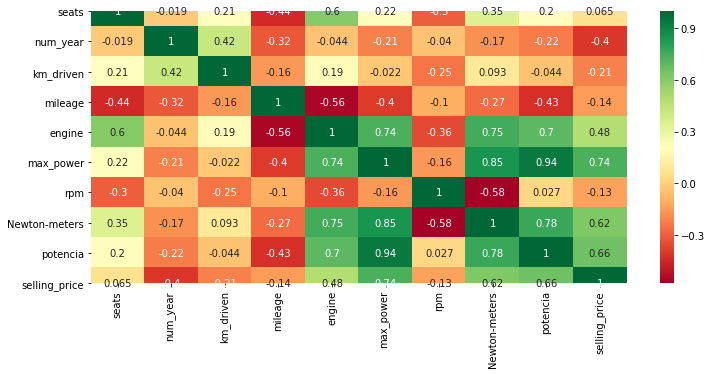

In [18]:
plt.figure(figsize=(12,5))
sns.heatmap(df_filter.corr(), cmap='RdYlGn', annot=True)
plt.show()

Las variables que mas desconfianza me genera al momento de evaluar el _'Selling_price'_ las evaluare mediante un grafico para ver como se comporta y como se distribuyen las muestras

Esta informacion nos ayudará a identificar algunos 'outliers' y proceder a eliminarlos, eliminaremos los Newton-meters mayor a 700 Nm, por capacidad fisica de la mayoria de autos

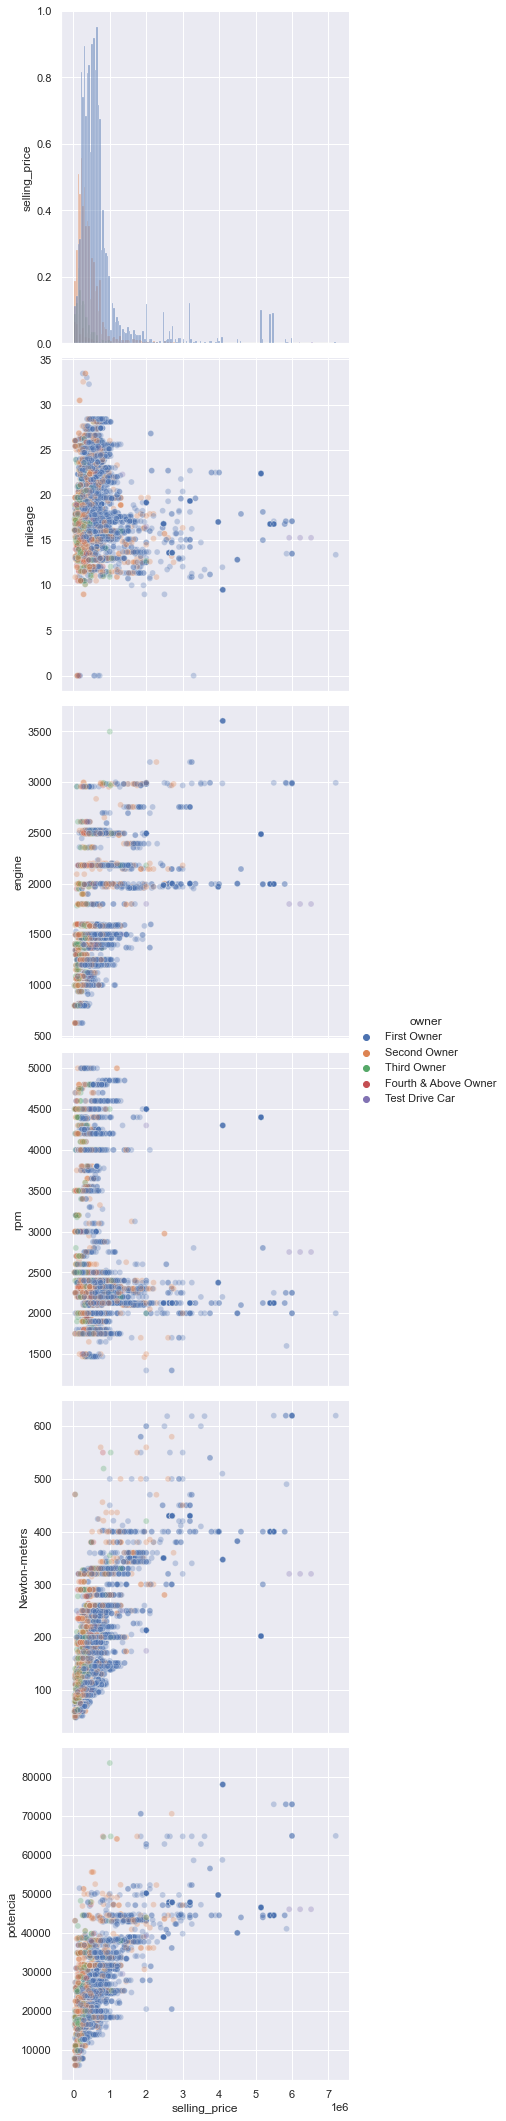

In [114]:
y_vars= ['selling_price','mileage', 'engine', 'rpm', 'Newton-meters', 'potencia']
x_vars= ['selling_price']
g = sns.PairGrid(df_filter, height=5, hue='owner', x_vars=x_vars, y_vars=y_vars)
g.map_diag(sns.histplot, color='.3')
g.map_offdiag(sns.scatterplot, alpha=.3)
g.add_legend()

Comprobamos que la relacion entre Newton-meters vs rpm **(potencia)** tiene mayor correlacion con respecto a la variable independiente _'Selling_price'_, por ello procedemos a eliminar estas dos variables ~Newton-meters & rpm~

In [19]:
df_filter.drop(labels=['Newton-meters', 'rpm'], axis='columns', inplace=True)

> Nota: Intentar manejar dos escenarios:
1.Manejar todas las categorias de las marcas
2.Segmentar las marcas por valor maximo, para agrupar autos del mismo estrato.

In [20]:
marcas_count = df_filter.groupby('marca')['selling_price'].count().sort_values(ascending=False)

In [24]:
sns.set_theme('darkgrid')
m = sns.catplot(data=df_filter, x='marca', kind='count', order=marcas_count.index, height=8)
m.set_titles('Cantidad de autos según marca')
m.set_xticklabels(rotation=90)

AttributeError: module 'seaborn' has no attribute 'set_theme'

In [23]:
# Utilizo el descending order, para colocar primero los menos valorados para al momeno de segmentar, el 0 sea el menos valorizado
# que el 25
marcas_max = df_filter.groupby('marca')['selling_price'].agg(['count','min', 'max', 'mean']).sort_values('max', ascending=True)
marcas_max

,count,min,max,mean
marca,,,,
Opel,1,68000,68000,6.800000e+04
Daewoo,3,45000,100000,7.700000e+04
Ambassador,4,75000,200000,1.240000e+05
Ashok,1,300000,300000,3.000000e+05
Datsun,65,150000,590000,3.146000e+05
Fiat,41,100000,700000,3.171951e+05
Force,6,555000,1050000,8.875000e+05
Nissan,81,110000,1200000,4.654074e+05
Maruti,2353,29999,1200000,4.103856e+05


### DataFrame modelo
>Considerar este DataFrame como el modelo al cual el usuario suministrara los datos

In [25]:
df_pure = df_filter.copy()
df_pure.head()

,marca,model,fuel,seller_type,transmission,owner,seats,num_year,km_driven,mileage,engine,max_power,potencia,selling_price
0,Maruti,Swift,Diesel,Individual,Manual,First Owner,5,7,145500,23.40,1248.0,74.00,19896.753473,450000
1,Skoda,Rapid,Diesel,Individual,Manual,Second Owner,5,7,120000,21.14,1498.0,103.52,26179.938780,370000
2,Honda,City,Petrol,Individual,Manual,Third Owner,5,15,140000,17.70,1497.0,78.00,17602.158838,158000
3,Hyundai,i20,Diesel,Individual,Manual,First Owner,5,11,127000,23.00,1396.0,90.00,25871.939500,225000
4,Maruti,Swift,Petrol,Individual,Manual,First Owner,5,14,120000,16.10,1298.0,88.20,26564.937880,130000


In [26]:
for cat in df_pure.columns[2:6]:
    print(df[cat].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


Seguimos trabajando con el DataFrame anterior para ver como se distribuirian los datos bajo la premisa de agrupar las marcas según su estrato

In [27]:
categories = np.array(marcas_max.index)
ordinal = OrdinalEncoder(categories=[categories]) # Colocar en corchetes
ordinal.fit(df_filter[['marca']])
df_filter['marca_label'] = ordinal.transform(df_filter[['marca']])
display(ordinal.inverse_transform([[0], [25], [12]]) , pd.cut(df_filter['marca_label'], bins=[-1, 5, 15, 25, 31]))

array([['Opel'],
       ['Jeep'],
       ['Tata']], dtype=object)

0        (5, 15]
1       (15, 25]
2       (15, 25]
3       (15, 25]
4        (5, 15]
5       (15, 25]
6        (5, 15]
7        (5, 15]
8       (15, 25]
9       (15, 25]
10       (5, 15]
11       (5, 15]
12       (5, 15]
14       (5, 15]
15       (5, 15]
16       (5, 15]
17      (15, 25]
18       (5, 15]
19      (15, 25]
20       (5, 15]
21      (15, 25]
22       (5, 15]
23       (5, 15]
24       (5, 15]
25       (5, 15]
26       (5, 15]
27       (5, 15]
28       (5, 15]
29       (5, 15]
30       (5, 15]
          ...   
8097    (15, 25]
8098     (5, 15]
8099     (5, 15]
8100     (5, 15]
8101     (-1, 5]
8102    (15, 25]
8104    (15, 25]
8105    (15, 25]
8106    (15, 25]
8107     (5, 15]
8108     (5, 15]
8109    (15, 25]
8110     (5, 15]
8111    (15, 25]
8112    (15, 25]
8113    (15, 25]
8114     (5, 15]
8115     (5, 15]
8116     (5, 15]
8117     (5, 15]
8118    (15, 25]
8119     (5, 15]
8120    (15, 25]
8121     (5, 15]
8122    (15, 25]
8123    (15, 25]
8124    (15, 25]
8125     (5, 1

In [121]:
"Opel" in categories

True

In [28]:
marcat = pd.cut(df_filter['marca_label'], bins=[-1, 5, 15, 25, 32], labels=['Cheaper', 'Afordable', 'Normal', 'Expensive'])
display(len(df_filter[['marca']]),len(marcat))

7686

7686

In [29]:
df_filter['marca_group'] = pd.cut(df_filter['marca_label'], bins=[-1, 5, 15, 25, 31], labels=['Cheaper', 'Afordable', 'Normal', 'Expensive'])
df_filter[df_filter.marca == 'Opel']

,marca,model,fuel,seller_type,transmission,owner,seats,num_year,km_driven,mileage,engine,max_power,potencia,selling_price,marca_label,marca_group
4372,Opel,Astra,Petrol,Individual,Manual,Third Owner,5,23,110000,13.1,1598.0,77.0,17739.526517,68000,0.0,Cheaper


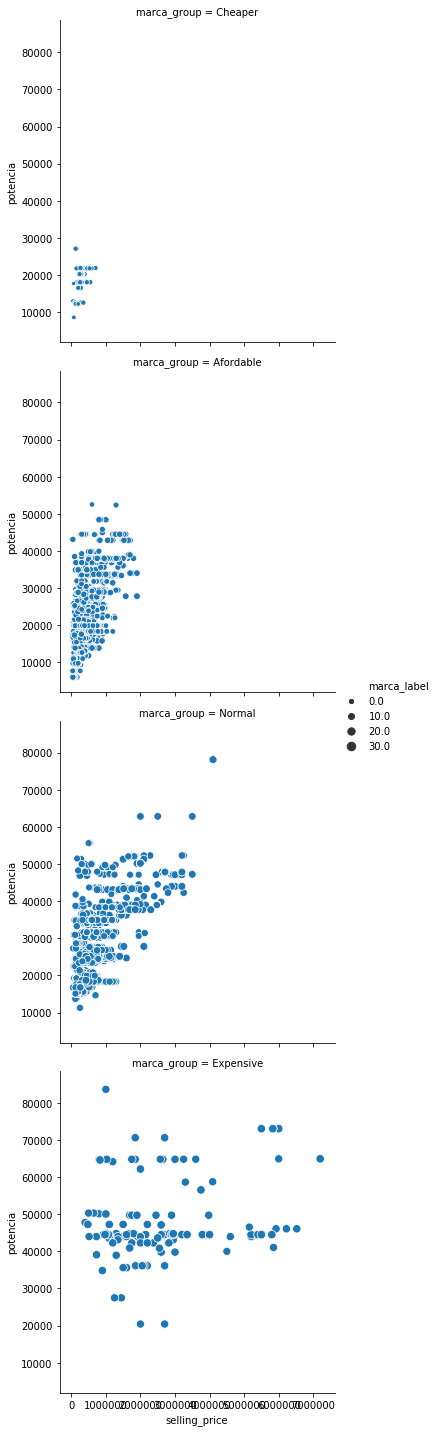

In [30]:
p = sns.relplot(data=df_filter, x='selling_price', y='potencia', row='marca_group', size='marca_label')

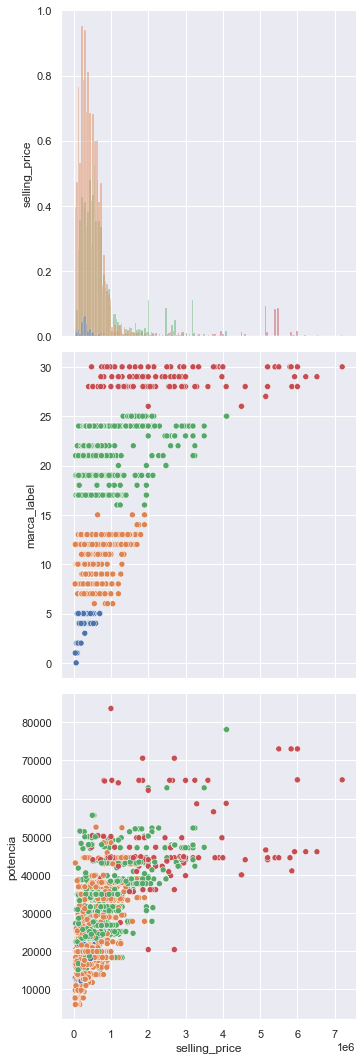

In [125]:
p2 = sns.PairGrid(data=df_filter, x_vars=['selling_price'], y_vars=['selling_price','marca_label','potencia'], hue='marca_group', height=5)
p2.map_diag(sns.histplot, color='.3')
p2.map_offdiag(sns.scatterplot)

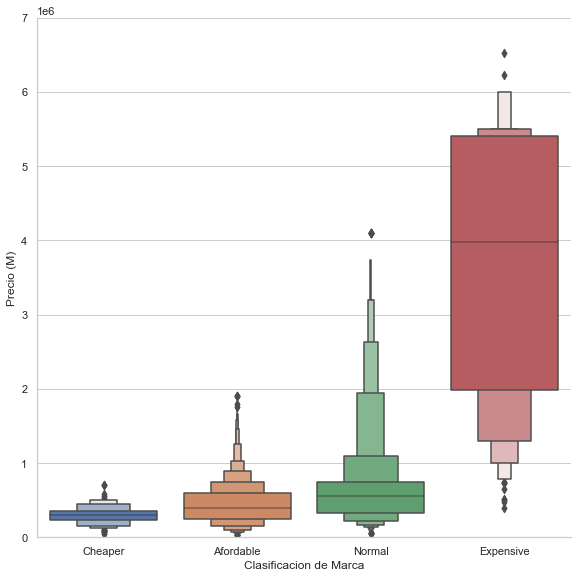

In [126]:
sns.set_style('whitegrid')
vi = sns.catplot(data=df_filter, x='marca_group', y='selling_price', kind='boxen', height=8)
vi.set_axis_labels('Clasificacion de Marca', 'Precio (M)')
vi.set_titles('Distribucion de precios por Categoria de Marcas')
vi.set(ylim=(0,7000000))

No sé si estare haciendo algun daño al modelo de entrenamiento al dejar una diferencia tan alta entre la clase "Expensive", con respecto a las demas. Baso esta decision en que hay marcas de autos que son muchisimo mas caras que el resto. (BMW, Audi, Lexus, Mercedes-Benz)

## Boceto de creacion de Pipeline's

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_validate, cross_val_predict
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.tree import ExtraTreeRegressor

## Escenarios
* Manejaremos los datos con la vaiable de Marca_label, para acelerar el proceso en conseguir resultado de los modelos
* Manejaremos los datos de marca directamente, y nos forzaremos a construir un Pipeline que realice el procesado de la variable de igual manera que el escenario A

In [32]:
df_final = df_filter.copy() #A

In [58]:
df_marca = df_pure.copy() #B

In [34]:
df_final.drop(labels=['marca', 'model','marca_label', 'potencia', 'engine',], axis='columns', inplace=True) #A

In [59]:
df_marca.drop(labels=['model', 'potencia', 'engine'], axis='columns', inplace=True) #B

In [36]:
#A
X_A = df_final.drop(labels='selling_price', axis=1)
y_A= df_final.selling_price

In [60]:
#B
X_B = df_marca.drop('selling_price', axis=1)
y_B = df_marca['selling_price']

In [38]:
# Para evitar que la distribucion de las marcas esten desproporcianada, dado que es importante la desproporcion entre la marca
# Expensive con respecto a las demas
X_train, X_test, y_train, y_test = train_test_split(X_A, y_A, test_size=0.2, stratify=df_final[['marca_group']]) #A

Dejare la misma estratificacion del model A para asegurar que tendre la misma cantidad de labels en ambas muestras

In [61]:
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, y_B, test_size=0.2, stratify=df_final[['marca_group']]) #B

## Comparacion de las muestras de ambos escenarios

In [40]:
display(X_train.head(), y_train.head(), X_train.shape, X_test.shape)

,fuel,seller_type,transmission,owner,seats,num_year,km_driven,mileage,max_power,marca_group
2134,Petrol,Individual,Automatic,Second Owner,5,16,80000,9.00,218.0,Normal
1653,Petrol,Individual,Manual,Second Owner,5,12,90000,20.36,78.9,Normal
3080,Diesel,Dealer,Automatic,First Owner,5,4,45000,19.33,177.0,Normal
1049,Petrol,Individual,Manual,First Owner,5,5,22000,25.17,53.3,Afordable
439,Diesel,Individual,Manual,Second Owner,5,6,110000,20.14,88.8,Afordable


2134     285000
1653     170000
3080    3200000
1049     250000
439      520000
Name: selling_price, dtype: int64

(6148, 10)

(1538, 10)

In [41]:
display(X_train_B.head(), y_train_B.head(), X_train_B.shape, X_test_B.shape)

,marca,fuel,seller_type,transmission,owner,seats,num_year,km_driven,mileage,max_power
5154,Volkswagen,Diesel,Individual,Manual,First Owner,5,3,18000,21.66,108.62
3646,Mahindra,Diesel,Individual,Manual,First Owner,9,6,90000,15.40,75.00
7861,Tata,Diesel,Individual,Manual,First Owner,7,6,110000,14.10,147.94
3715,Maruti,Diesel,Individual,Manual,Second Owner,5,12,100000,17.80,75.00
6487,Chevrolet,Diesel,Individual,Manual,First Owner,5,8,80000,22.10,76.90


5154    560000
3646    720000
7861    503000
3715    221000
6487    200000
Name: selling_price, dtype: int64

(6148, 10)

(1538, 10)

In [51]:
display(df_filter.marca_group.value_counts()/df_filter.shape[0], X_train.marca_group.value_counts()/X_train.shape[0])

Afordable    0.578584
Normal       0.374187
Expensive    0.032266
Cheaper      0.014962
Name: marca_group, dtype: float64

Afordable    0.578562
Normal       0.374268
Expensive    0.032206
Cheaper      0.014964
Name: marca_group, dtype: float64

## Comenzaremos con el escenario B

In [191]:
segment_marca= FunctionTransformer(lambda x: pd.DataFrame((pd.cut(list(map(int,x)), bins=[0, 5, 15, 25, 31], include_lowest=True, labels=[0, 1, 2, 3])), columns=['marca'] ))

El valor de lamda tiene que estar encerrado bajo esa estructura, dado que el resultado del OrdinalEncoder es una lista de array, asi como se muestra a continuacion:

In [192]:
ordinal.transform(df_marca[['marca']])

array([[ 8.],
       [22.],
       [19.],
       ...,
       [ 8.],
       [12.],
       [12.]])

In [193]:
segment_marca.fit_transform([26, 27, 28, 0])

,marca
0,3
1,3
2,3
3,0


In [194]:
categories = np.array(marcas_max.index)
marca_prep = make_pipeline(OrdinalEncoder(categories=[categories]), segment_marca)

In [195]:
marca_prep.fit_transform(df_marca[['marca']])

,marca
0,1
1,2
2,2
3,2
4,1
5,2
6,1
7,1
8,2
9,2


In [196]:
marca_trans = make_column_transformer((marca_prep, ['marca']),
                                      (OneHotEncoder(drop='first'), ['fuel', 'seller_type', 'transmission', 'owner']),
                                     remainder='passthrough')
prueba = marca_trans.fit_transform(X_train_B)

In [197]:
prueba

array([[1.000e+00, 1.000e+00, 0.000e+00, ..., 1.300e+05, 1.745e+01,
        1.000e+02],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 7.720e+03, 2.000e+01,
        7.100e+01],
       [2.000e+00, 0.000e+00, 0.000e+00, ..., 5.000e+03, 1.719e+01,
        8.186e+01],
       ...,
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 7.000e+04, 2.520e+01,
        7.400e+01],
       [3.000e+00, 1.000e+00, 0.000e+00, ..., 7.500e+03, 1.678e+01,
        1.900e+02],
       [2.000e+00, 0.000e+00, 0.000e+00, ..., 5.000e+03, 1.890e+01,
        8.186e+01]])

In [198]:
ETR = ExtraTreeRegressor()
ETR.fit(prueba, y_train_B)

ExtraTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                   max_features='auto', max_leaf_nodes=None,
                   min_impurity_decrease=0.0, min_impurity_split=None,
                   min_samples_leaf=1, min_samples_split=2,
                   min_weight_fraction_leaf=0.0, random_state=None,
                   splitter='random')

In [78]:
X_train_B.head()

,marca,fuel,seller_type,transmission,owner,seats,num_year,km_driven,mileage,max_power
3960,Mahindra,Diesel,Individual,Manual,First Owner,7,5,130000,17.45,100.00
4718,Renault,Petrol,Individual,Manual,First Owner,7,2,7720,20.00,71.00
1736,Hyundai,Petrol,Individual,Manual,First Owner,5,2,5000,17.19,81.86
632,Mahindra,Diesel,Individual,Manual,First Owner,7,5,60000,15.40,120.00
5938,Skoda,Diesel,Individual,Manual,Second Owner,5,10,140000,20.00,108.50


In [199]:
clf_B = make_pipeline(marca_trans, ExtraTreeRegressor())

In [203]:
clf_B.fit(X_train_B, y_train_B)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline',
                                                  Pipeline(memory=None,
                                                           steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[array(['Opel', 'Daewoo', 'Ambassador', 'Ashok', 'Datsun', 'Fiat', 'Force',
       'Nissan', 'Maruti', 'Renault', 'Chevr...
                                                  ['fuel', 'seller_type',
                                                   'transmission', 'owner'])],
                                   verbose=False)),
                ('extratreeregressor',
                 ExtraTreeRegressor(ccp_alpha=0.0, criterion='mse',
 

In [302]:
clf_B.steps[0][1]

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[array(['Opel', 'Daewoo', 'Ambassador', 'Ashok', 'Datsun', 'Fiat', 'Force',
       'Nissan', 'Maruti', 'Renault', 'Chevrolet', 'Volkswagen', 'Tata',
       'Mahindra', 'MG', 'Kia', 'Isuzu', 'Hyundai', 'Mitsubishi', 'Honda',
       'Volvo', 'Ford', 'Skoda', 'Jaguar', 'Toyota', 'Jeep', 'Land',
       'Lexus', 'Mercedes-Benz', 'Audi', 'BMW'], dtype=object)])),
                                                 ('functiontransformer',
                                                  FunctionTransformer(func=<function <lambda> at 0x00000000193543A8>))]),
                                 ['marca']),
                                ('onehotencoder', OneHotEncoder(drop='first'),
                                 ['fuel', 'seller_type', 'transmission',
                

In [204]:
clf_B.score(X_test_B, y_test_B)

0.9399060137319644

In [205]:
import cloudpickle
import pickle
import dill

> Cloudpickle lo usamos para casos en los que tengamos alguna funcion lambda o algun otra funcion que no pueda serializar el pickle normalmente

In [208]:
cloudpickle.dump(clf_B, open('model_carpre_vb.pkl', 'wb'))

In [206]:
dill.dump(clf_B, open('model_carpre_vb2.pkl', 'wb'))

In [86]:
mm = cloudpickle.load(open('model_carpre_vb.pkl', 'rb'))

C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator OrdinalEncoder from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator FunctionTransformer from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator Pipeline from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking 

In [207]:
sample = X_test_B.iloc[0].to_dict()
sample_df = pd.DataFrame(sample, index=[0])
display(mm.predict(sample_df), sample_df, X_test_B.iloc[0].tolist())

array([780000.])

,marca,fuel,seller_type,transmission,owner,seats,num_year,km_driven,mileage,max_power
0,Maruti,Diesel,Individual,Manual,Second Owner,7,5,50000,24.52,88.5


['Maruti',
 'Diesel',
 'Individual',
 'Manual',
 'Second Owner',
 7,
 5,
 50000,
 24.52,
 88.5]

In [218]:
col = ['marca','fuel','seller_type','transmission','owner','seats','num_year','km_driven','mileage','max_power']
ingreso = ['Maruti', 'Diesel', 'Individual', 'Manual', 'Second Owner', 7, 5, 50000, 24.52, 88.5]
paso2 = pd.DataFrame(ingreso).T
paso2.columns=col
paso2

,marca,fuel,seller_type,transmission,owner,seats,num_year,km_driven,mileage,max_power
0,Maruti,Diesel,Individual,Manual,Second Owner,7,5,50000,24.52,88.5


In [219]:
df_marca.drop('selling_price', axis=1).values

array([['Maruti', 'Diesel', 'Individual', ..., 145500, 23.4, 74.0],
       ['Skoda', 'Diesel', 'Individual', ..., 120000, 21.14, 103.52],
       ['Honda', 'Petrol', 'Individual', ..., 140000, 17.7, 78.0],
       ...,
       ['Maruti', 'Diesel', 'Individual', ..., 120000, 19.3, 73.9],
       ['Tata', 'Diesel', 'Individual', ..., 25000, 23.57, 70.0],
       ['Tata', 'Diesel', 'Individual', ..., 25000, 23.57, 70.0]],
      dtype=object)

El problema con el metodo de usar valores (sin columnas), es que no sabria como mapear las variables para aplicarles el OntHotEncoding y el FunctionTransformer, etc.

Aunque aparentemente puedo utilizar la posicion como numero enteros en lugar de string (nombre de la columna)

## Pipeline for linear models

In [35]:
norma_ln_svr = make_column_transformer((StandardScaler(), ['num_year', 'km_driven','mileage', 'max_power']),
                                        (OneHotEncoder(drop='first'), ['fuel', 'seller_type', 'transmission', 'owner', 'marca_group'])
                                       )
                                       
clf_ln_svr = make_pipeline(normalizacion_svr, SVR())

In [43]:
norma_ln_svr.get_feature_names

<bound method ColumnTransformer.get_feature_names of ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['num_year', 'km_driven', 'mileage',
                                  'max_power']),
                                ('onehotencoder', OneHotEncoder(drop='first'),
                                 ['fuel', 'seller_type', 'transmission',
                                  'owner', 'marca_group'])])>

## Pipeline for non linear models

In [304]:
norm_nl = make_column_transformer((OneHotEncoder(drop='first'), ['fuel', 'seller_type', 'transmission', 'owner', 'marca_group']), remainder='passthrough')
clf_nl = make_pipeline(norm_nl, ExtraTreeRegressor())

In [305]:
clf_nl.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['fuel', 'seller_type',
                                                   'transmission', 'owner',
                                                   'marca_group'])])),
                ('extratreeregressor', ExtraTreeRegressor())])

In [88]:
importances = clf_nl.steps[1][1].feature_importances_
#clf_nl['extratreeregressor'].feature_importances_

In [126]:
features = clf_nl.steps[0][1].get_feature_names()

In [130]:
features_clean = [re.findall('(?<=\_x\d\_)(\w+)', x)[0] if x.startswith('onehotencoder') else x for x in features ]

In [120]:
dd = 'onehotencoder__x0_Diesel'
re.findall('(?<=\_x\d\_)(\w+)', dd)
dd.startswith('onehotencoder')

True

In [128]:
df_fi = pd.Series(data=importances, index=features_clean, name='indicator').sort_values(ascending=False)
df_fi

Expensive     0.497811
num_year      0.137608
max_power     0.086002
Manual        0.076792
Individual    0.067969
Petrol        0.036133
mileage       0.025005
Normal        0.019730
Diesel        0.016603
km_driven     0.014490
seats         0.011301
Second        0.005419
Trustmark     0.004164
Third         0.000472
Test          0.000245
Fourth        0.000135
Cheaper       0.000106
LPG           0.000015
Name: indicator, dtype: float64

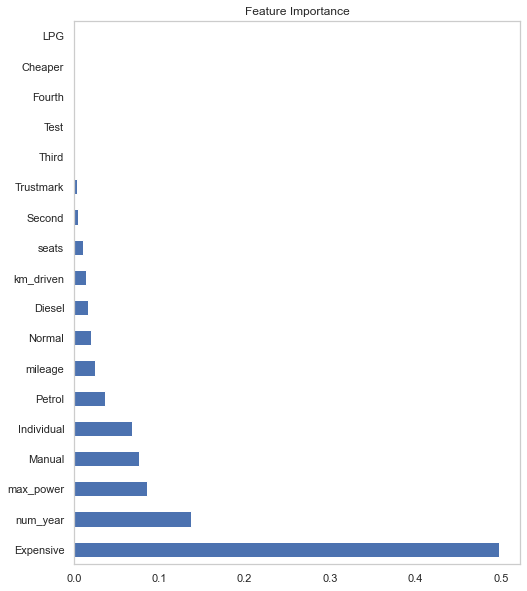

In [131]:
df_fi.plot(kind='barh', figsize=(8,10), title='Feature Importance', grid=False)
plt.show()

Necesito buscar la manera de asignar el nombre correspondiente a los valores del _'feature_importances_'_

In [81]:
clf_nl.score(X_test, y_test)

0.9589139618073679

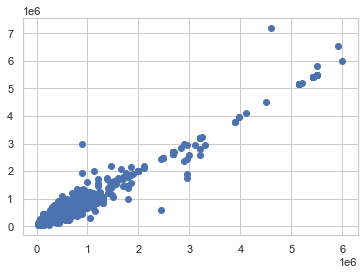

In [82]:
y_pred = clf_nl.predict(X_test)
plt.scatter(y_pred, y_test)
plt.show()

In [84]:
score_xtree = cross_validate(clf_nl, X_train, y_train, scoring=['r2', 'neg_mean_absolute_error'],n_jobs=-1, verbose=0)
print(np.mean(score_xtree['test_r2']))

0.9457439530542885


In [306]:
pickle.dump(clf_nl, open('model_carpre_va.pkl', 'wb'))

## Prueba de SVM seccionado
Pasos de prueba dada la alta demanda que exige el kernel del SVM, el preprocessing de StandarScalar y OneHotEncoder lo hice aparte.

In [132]:
preprocessing_train = normalizacion_svr.fit_transform(X_train)
preprocessing_test = normalizacion_svr.fit_transform(X_test)
display(normalizacion_svr.transformers, X_train.loc[0,:], preprocessing_train[0], X_test.iloc[0,:], preprocessing_test[0])

[('standardscaler',
  StandardScaler(),
  ['num_year', 'km_driven', 'mileage', 'max_power']),
 ('onehotencoder',
  OneHotEncoder(drop='first'),
  ['fuel', 'seller_type', 'transmission', 'owner', 'marca_group'])]

fuel                 Diesel
seller_type      Individual
transmission         Manual
owner           First Owner
seats                     5
num_year                  7
km_driven            145500
mileage                23.4
max_power              74.0
marca_group       Afordable
Name: 0, dtype: object

array([ 0.01117354, -0.07573403, -1.12665627,  0.34092272,  0.        ,
        0.        ,  1.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ])

fuel                 Diesel
seller_type      Individual
transmission         Manual
owner           Third Owner
seats                     5
num_year                  4
km_driven             35000
mileage                22.0
max_power             126.2
marca_group          Normal
Name: 2842, dtype: object

array([-0.74305668, -0.55313878,  0.65789186,  1.01499472,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ])

In [133]:
svr = SVR()

In [134]:
parameters = {}
parameters['svr__C'] = [100, 1000]
parameters['svr__degree'] = [2, 3, 5, 10]
parameters['svr__epsilon'] = [1, 1.5, 2]
parameters['svr__gamma'] = ['scale', 'auto']
parameters['svr__kernel'] = ['poly', 'rbf', 'sigmoid']

In [60]:
cv_svr = RandomizedSearchCV(svr, param_distributions=parameters, scoring = 'neg_mean_absolute_error', n_jobs= 1)

RandomizedSearchCV(estimator=SVR(), n_jobs=1,
                   param_distributions={'svr__C': [100, 1000],
                                        'svr__degree': [2, 3, 5, 10],
                                        'svr__epsilon': [1, 1.5, 2],
                                        'svr__gamma': ['scale', 'auto'],
                                        'svr__kernel': ['poly', 'rbf',
                                                        'sigmoid']},
                   scoring='neg_mean_absolute_error')

In [138]:
score_svr = cross_validate(svr, preprocessing_train, y_train, scoring=['r2', 'neg_mean_absolute_error'],n_jobs=-1, verbose=0)

In [139]:
np.mean(score_svr['test_r2'])

-0.0569789311131796

In [141]:
y_pred_svr = cross_val_predict(svr, preprocessing_train, y_train, n_jobs=-1, verbose=0)

In [61]:
#First try
#cv.fit(preprocessing_train, y_train)
#print(cv_svr.best_params_)
#print(cv_svr.best_score_)

In [62]:
#y_pred = cv_svr.predict(preprocessing_test)
#display(y_pred[:10], y_test[:10])

## RidgeRegression 

<AxesSubplot:>

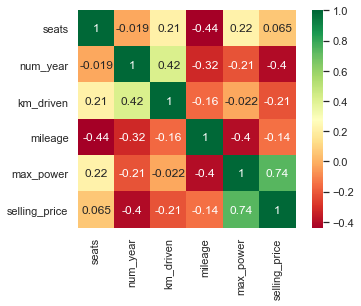

In [66]:
sns.heatmap(df_final.corr(), annot=True, cmap='RdYlGn', square=True)

In [44]:
cv_rd = make_pipeline(norma_ln_svr, RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]))
cv_rd

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['num_year', 'km_driven',
                                                   'mileage', 'max_power']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['fuel', 'seller_type',
                                                   'transmission', 'owner',
                                                   'marca_group'])])),
                ('ridgecv',
                 RidgeCV(alphas=array([0.001, 0.01 , 0.1  , 1.   ])))])

In [46]:
cv_rd.fit(X_train, y_train)
score_rd = cross_validate(cv_rd, X_train, y_train,scoring=['r2', 'neg_mean_absolute_error'],n_jobs=-1, verbose=0)
y_pred_rd = cross_val_predict(cv_rd, X_test, y_test, n_jobs=-1, verbose=0)
print(np.mean(score_rd['test_r2']), cv_rd['ridgecv'].coef_, cv_rd['columntransformer'])
#display(y_pred_rd[:10], y_test[:10])

0.7681384872575856 [-1.62585971e+05 -5.36494625e+04 -1.51249271e+04  2.83014310e+05
  4.62538766e+04  1.04548729e+05 -7.20113309e+04 -2.01180971e+05
 -1.51948914e+05 -2.05378449e+05  5.35907412e+04 -4.88223898e+04
  1.34953621e+06  1.46897067e+02 -6.64932065e+04  1.78760235e+06
  3.02352924e+04] ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['num_year', 'km_driven', 'mileage',
                                  'max_power']),
                                ('onehotencoder', OneHotEncoder(drop='first'),
                                 ['fuel', 'seller_type', 'transmission',
                                  'owner', 'marca_group'])])


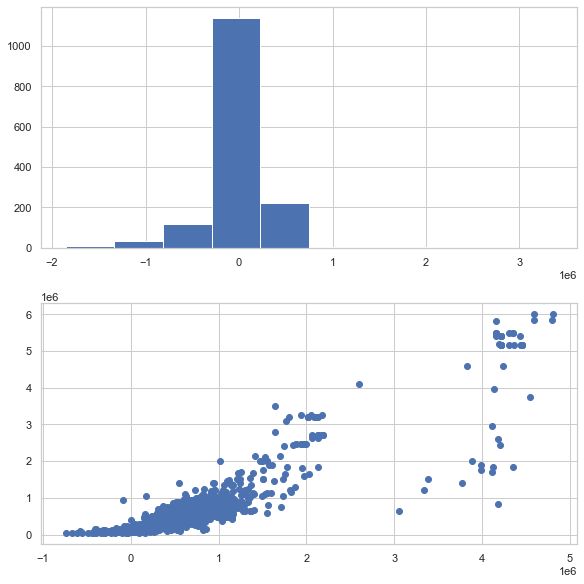

In [125]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(8,8), constrained_layout=True)
gs = gridspec.GridSpec(2,2, figure=fig)
fig_1 = fig.add_subplot(gs[0,:])
fig_1.hist(y_pred_rd-y_test)
fig_2 = fig.add_subplot(gs[1,:])
fig_2.scatter(y_pred_rd, y_test)
plt.show()